In [6]:

import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
import keras
import datetime
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from os import walk


In [7]:

zero_path = r"C:\Users\oonak\Desktop\202401\TESTING\PYTHON\DATA\zero.wav"
one_path = r"C:\Users\oonak\Desktop\202401\TESTING\PYTHON\DATA\one.wav"
two_path = r"C:\Users\oonak\Desktop\202401\TESTING\PYTHON\DATA\two.wav"
three_path = r"C:\Users\oonak\Desktop\202401\TESTING\PYTHON\DATA\three.wav"


In [9]:

zero_signal, zero_sr = librosa.load(zero_path, sr=16000)
one_signal, one_sr = librosa.load(one_path, sr=16000)
two_signal, two_sr = librosa.load(two_path, sr=16000)
three_signal, three_sr = librosa.load(three_path, sr=16000)


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

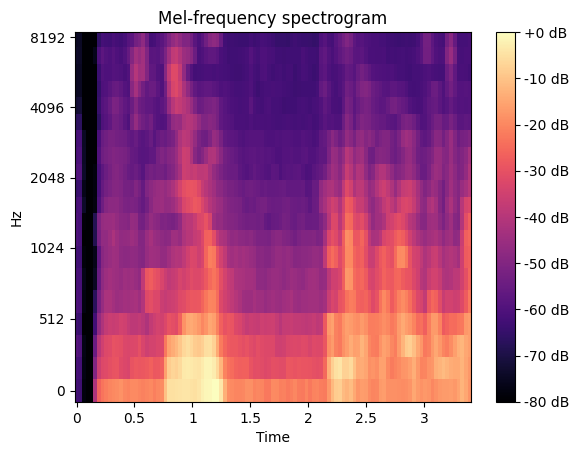

In [10]:

zero_dur_time = librosa.get_duration(y=zero_signal,sr=zero_sr)
zero_time_sec = round(zero_dur_time)
S = librosa.feature.melspectrogram(y=zero_signal, sr=zero_sr, n_mels=20, fmax=8000)
fig, ax = plt.subplots()
zero_S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(zero_S_dB, x_axis='time',y_axis='mel', sr=zero_sr,fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

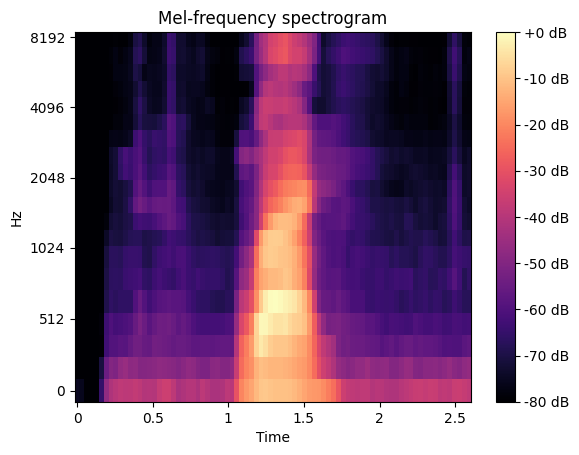

In [11]:

one_dur_time = librosa.get_duration(y=one_signal,sr=one_sr)
one_time_sec = round(one_dur_time)
S = librosa.feature.melspectrogram(y=one_signal, sr=one_sr, n_mels=20, fmax=8000)
fig, ax = plt.subplots()
one_S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(one_S_dB, x_axis='time',y_axis='mel', sr=one_sr,fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

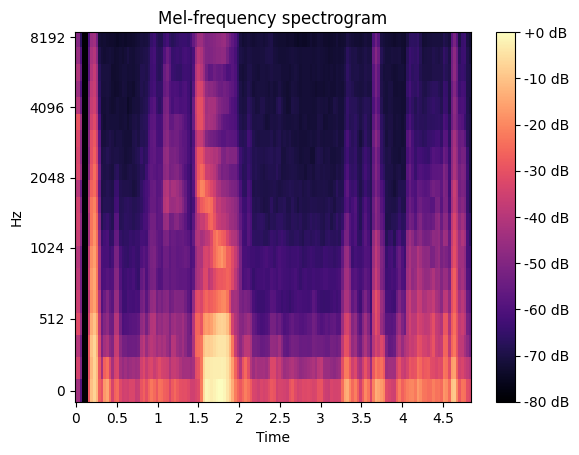

In [12]:

two_dur_time = librosa.get_duration(y=two_signal,sr=two_sr)
two_time_sec = round(two_dur_time)
S = librosa.feature.melspectrogram(y=two_signal, sr=two_sr, n_mels=20, fmax=8000)
fig, ax = plt.subplots()
two_S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(two_S_dB, x_axis='time',y_axis='mel', sr=two_sr,fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

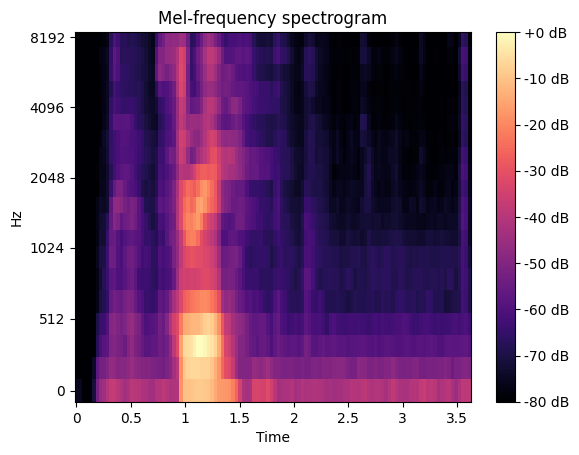

In [13]:

three_dur_time = librosa.get_duration(y=three_signal,sr=three_sr)
three_time_sec = round(three_dur_time)
S = librosa.feature.melspectrogram(y=three_signal, sr=three_sr, n_mels=20, fmax=8000)
fig, ax = plt.subplots()
three_S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(three_S_dB, x_axis='time',y_axis='mel', sr=three_sr,fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')


In [14]:

zero_audio_data = pd.DataFrame(zero_S_dB)
zero_audio_data = zero_audio_data.T
zero_audio_data.tail()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
102,-17.275702,-14.641130,-16.162951,-24.770006,-35.775867,-38.805054,-41.694073,-47.559341,-49.146664,-46.773991,-47.554714,-47.879898,-49.425129,-50.178280,-54.511837,-58.323582,-56.370998,-56.629581,-52.383865,-55.714680
103,-15.438517,-14.602102,-13.238726,-23.292130,-35.273430,-38.596630,-43.586079,-47.141335,-50.251663,-49.529125,-49.418354,-51.106194,-51.794937,-54.249004,-58.069103,-59.447903,-59.338402,-61.420284,-61.431080,-62.309261
104,-12.546562,-12.572243,-12.266161,-22.537214,-32.151207,-34.994057,-35.151833,-36.041176,-40.409119,-39.795773,-45.674942,-50.115086,-50.025341,-52.408703,-57.906040,-59.203247,-59.167553,-61.207943,-61.571507,-62.111881
105,-14.989197,-15.246950,-14.861895,-17.340120,-27.779573,-30.432089,-27.541769,-27.097525,-30.941053,-33.757881,-43.150158,-46.605412,-47.993923,-51.871323,-57.164658,-59.567650,-59.009022,-61.392536,-61.245403,-62.078442
106,-17.885113,-17.374765,-16.024195,-16.306973,-22.719721,-25.815990,-26.787970,-25.570213,-26.985739,-32.616135,-39.811131,-40.958199,-43.326054,-50.108768,-57.335491,-59.133968,-59.079308,-62.211864,-61.231342,-61.324596


In [15]:

pca = PCA(n_components=4)
pca.fit(zero_audio_data)


PCA(n_components=4)

In [24]:

zero_pca_data = pd.DataFrame(pca.transform(zero_audio_data))


In [25]:
zero_pca_data

,0,1,2,3
0,93.548248,-15.260361,-20.198326,8.319443
1,95.089928,-14.432063,-21.292715,9.393029
2,153.276428,-10.633198,-14.141281,8.091530
3,163.357590,-8.823009,-10.855573,3.172794
4,163.357590,-8.823009,-10.855573,3.172794
...,...,...,...,...
102,-11.027943,8.559508,4.015770,7.157877
103,-6.477401,0.373396,12.690125,7.342513
104,-21.271587,-8.353508,7.004682,2.529852
105,-32.057850,-18.805071,-2.322892,-2.831783


In [26]:

one_audio_data = pd.DataFrame(one_S_dB)
one_audio_data = one_audio_data.T
one_audio_data.tail()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
77,-38.738049,-46.338577,-59.783752,-63.009632,-66.582565,-63.057232,-66.411560,-67.592285,-66.561691,-65.856308,-66.614258,-68.561440,-71.414536,-73.946960,-74.843918,-73.152328,-73.067825,-70.380325,-69.340805,-72.276711
78,-36.456482,-48.546959,-60.229057,-61.452980,-63.486847,-58.794987,-62.146694,-62.817062,-60.568478,-59.725750,-60.212147,-62.397675,-66.923996,-69.667740,-70.008301,-67.181168,-67.018723,-64.306152,-62.960316,-66.222046
79,-36.235390,-49.674870,-60.043804,-61.686359,-65.606171,-63.115734,-63.654339,-66.252472,-64.976532,-64.357101,-64.800125,-67.043427,-71.048111,-73.083939,-73.688629,-71.635094,-71.487083,-69.059860,-67.767258,-70.785263
80,-36.983765,-47.509575,-57.910999,-62.694862,-67.811691,-68.427307,-64.816322,-69.535027,-71.846245,-72.304398,-73.782043,-73.779251,-75.095978,-76.674393,-78.110138,-78.567810,-78.359009,-77.162827,-77.896042,-78.422455
81,-38.436417,-46.669502,-56.915676,-62.450527,-67.612495,-65.935089,-65.268463,-69.298904,-72.627380,-73.991623,-73.231430,-73.291946,-73.538971,-76.875092,-78.356628,-78.529236,-78.821243,-77.675674,-77.115875,-79.034180


In [27]:

one_pca_data = pd.DataFrame(pca.transform(one_audio_data))


In [28]:
one_pca_data

,0,1,2,3
0,161.918762,-7.638378,-8.092062,2.463559
1,162.086853,-7.776772,-8.414907,2.546415
2,163.357590,-8.823009,-10.855573,3.172794
3,163.357590,-8.823009,-10.855573,3.172794
4,163.357590,-8.823009,-10.855573,3.172794
...,...,...,...,...
77,94.071487,1.237462,8.090940,-0.484189
78,78.535423,6.834116,-4.816136,-2.862936
79,90.212914,2.151028,5.116699,-1.832173
80,105.560127,-7.058088,21.435598,0.504500


In [29]:

two_audio_data = pd.DataFrame(two_S_dB)
two_audio_data = two_audio_data.T
two_audio_data.tail()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
147,-28.712833,-34.911003,-38.167274,-38.051933,-42.805519,-45.925201,-44.503632,-44.814827,-47.583145,-51.174362,-53.422134,-53.080658,-55.240898,-55.570702,-58.423599,-61.265541,-63.960098,-65.043922,-66.712845,-69.918869
148,-23.195372,-33.354889,-38.395851,-36.211655,-39.265656,-43.353973,-44.219513,-41.152061,-43.962273,-49.036789,-51.020607,-50.599045,-52.306473,-54.506149,-59.332375,-60.649574,-62.042503,-64.279602,-63.799736,-64.636116
149,-23.912960,-36.160774,-43.206062,-39.414398,-42.523643,-46.906013,-47.572990,-44.298264,-47.392036,-51.419792,-52.595802,-51.639153,-53.045776,-58.123566,-63.801956,-61.994583,-62.647240,-65.312408,-63.627174,-63.529915
150,-30.965660,-38.294395,-47.791161,-52.294739,-55.866287,-59.679703,-61.422890,-61.105301,-62.972710,-64.387573,-64.308434,-63.254837,-64.140518,-67.462265,-68.365608,-68.733154,-69.068687,-68.968407,-68.939339,-70.214989
151,-32.574852,-40.772568,-52.306885,-54.377655,-57.930733,-60.653870,-62.294594,-66.147263,-65.004265,-68.570602,-68.676277,-70.460709,-70.216515,-70.174919,-69.948456,-70.709061,-69.986053,-69.908493,-70.949020,-72.100403


In [30]:

two_pca_data = pd.DataFrame(pca.transform(two_audio_data))


In [31]:
two_pca_data

,0,1,2,3
0,-16.391300,17.539162,-57.388134,9.515111
1,-16.102978,16.599958,-57.569344,9.191666
2,44.917362,1.743066,-43.641987,10.272282
3,163.357590,-8.823009,-10.855573,3.172794
4,163.357590,-8.823009,-10.855573,3.172794
...,...,...,...,...
147,25.282034,-9.583770,-5.933201,1.059039
148,15.911462,-7.905522,-6.642667,-1.782369
149,26.440666,-5.622345,-4.958805,-2.300079
150,67.862534,1.479404,10.707606,2.737013


In [32]:

three_audio_data = pd.DataFrame(three_S_dB)
three_audio_data = three_audio_data.T
three_audio_data.tail()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
109,-44.723343,-51.765732,-58.097279,-61.361851,-69.295845,-70.879875,-69.161919,-72.899277,-74.436081,-75.436287,-77.180573,-78.481415,-77.895737,-79.417862,-78.298004,-79.187622,-80.000000,-80.000000,-80.000000,-80.000000
110,-41.836044,-51.909428,-57.583817,-62.671375,-68.827011,-68.118813,-67.221626,-70.093582,-68.687370,-69.701347,-71.111526,-70.529488,-72.512444,-75.350708,-74.526001,-75.334229,-76.024597,-73.160210,-71.743675,-75.843170
111,-38.553783,-50.528728,-57.193020,-61.157330,-62.480431,-62.080975,-62.141705,-61.423187,-59.350800,-59.954350,-62.507717,-60.560696,-62.188614,-65.845726,-65.201370,-66.271568,-67.055290,-62.636913,-61.020992,-65.793152
112,-39.014038,-49.432835,-57.051281,-60.805225,-63.711956,-63.249752,-63.762150,-63.173573,-61.116344,-61.654156,-64.240089,-62.213593,-63.787159,-67.290520,-66.828629,-67.969917,-68.768974,-64.388840,-62.730560,-67.445572
113,-38.478382,-50.726204,-58.800213,-63.174465,-69.116043,-68.773987,-71.368172,-74.128014,-74.781517,-74.360199,-75.912491,-76.265884,-77.484550,-78.205154,-78.602242,-79.296707,-79.547966,-78.218903,-77.575653,-80.000000


In [33]:

three_pca_data = pd.DataFrame(pca.transform(three_audio_data))


In [34]:
three_pca_data

,0,1,2,3
0,162.004700,-7.709137,-8.257132,2.505922
1,162.019028,-7.720936,-8.284651,2.512986
2,163.357590,-8.823009,-10.855573,3.172794
3,163.357590,-8.823009,-10.855573,3.172794
4,163.357590,-8.823009,-10.855573,3.172794
...,...,...,...,...
109,116.762711,-9.087347,21.861109,1.986387
110,103.508934,-1.779792,10.808113,2.474554
111,76.280724,8.687773,-8.790421,0.774134
112,80.590096,7.317380,-4.538625,1.734210


In [35]:

lables = np.zeros((zero_pca_data.shape[0],1))
zero = np.hstack((zero_pca_data, lables))


In [36]:

lables = np.ones((one_pca_data.shape[0],1))
one = np.hstack((one_pca_data, lables))


In [37]:

lables = np.ones((two_pca_data.shape[0],1))*2
two = np.hstack((two_pca_data, lables))


In [38]:

lables = np.ones((three_pca_data.shape[0],1))*3
three = np.hstack((three_pca_data, lables))


In [39]:

data = np.vstack((zero, one, two, three))


In [40]:

data = pd.DataFrame(data)
data.columns = ['0', '1', '2', '3', 'Y']


In [41]:
data

,0,1,2,3,Y
0,93.548248,-15.260361,-20.198326,8.319443,0.0
1,95.089928,-14.432063,-21.292715,9.393029,0.0
2,153.276428,-10.633198,-14.141281,8.091530,0.0
3,163.357590,-8.823009,-10.855573,3.172794,0.0
4,163.357590,-8.823009,-10.855573,3.172794,0.0
...,...,...,...,...,...
450,116.762711,-9.087347,21.861109,1.986387,3.0
451,103.508934,-1.779792,10.808113,2.474554,3.0
452,76.280724,8.687773,-8.790421,0.774134,3.0
453,80.590096,7.317380,-4.538625,1.734210,3.0


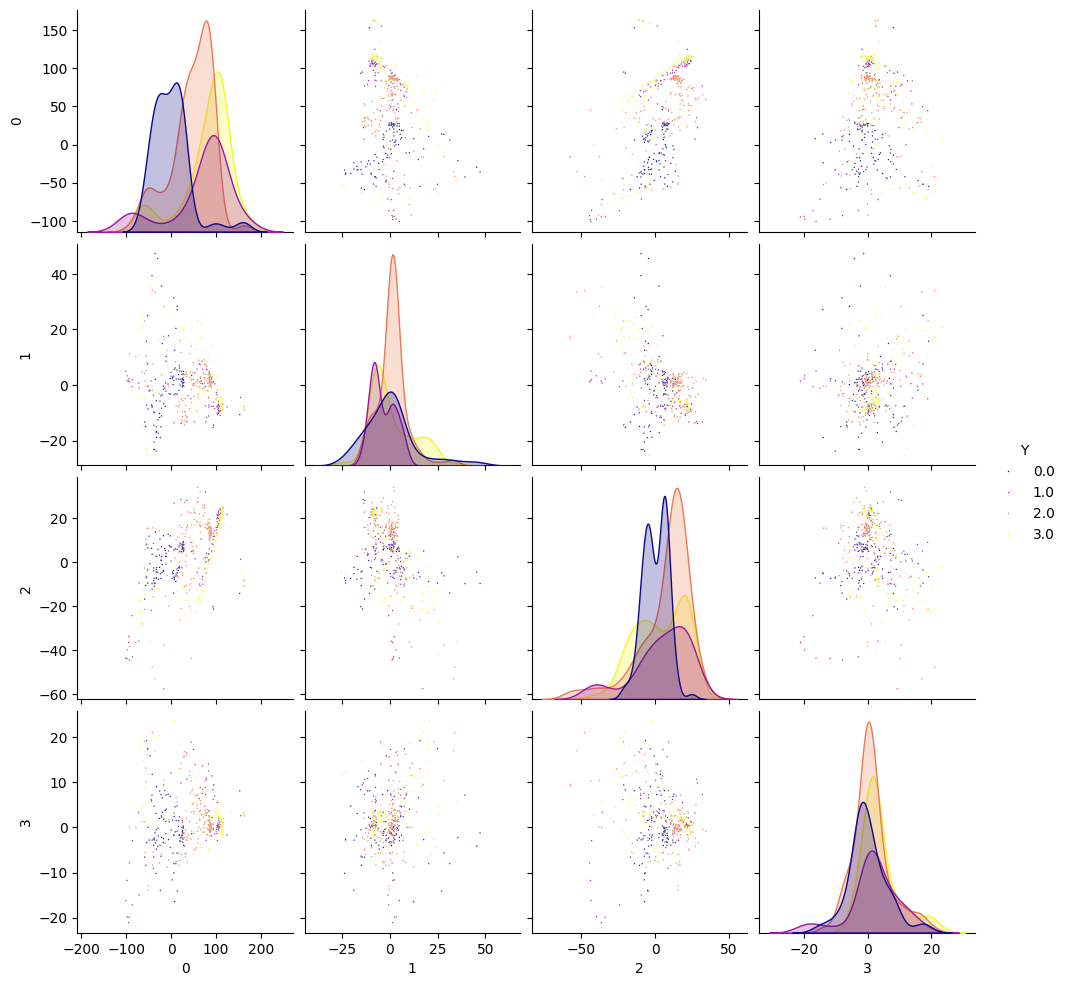

In [42]:
sns.pairplot(data,hue='Y',plot_kws={'s':1},palette='plasma')

In [43]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]

In [44]:
X

,0,1,2,3
0,93.548248,-15.260361,-20.198326,8.319443
1,95.089928,-14.432063,-21.292715,9.393029
2,153.276428,-10.633198,-14.141281,8.091530
3,163.357590,-8.823009,-10.855573,3.172794
4,163.357590,-8.823009,-10.855573,3.172794
...,...,...,...,...
450,116.762711,-9.087347,21.861109,1.986387
451,103.508934,-1.779792,10.808113,2.474554
452,76.280724,8.687773,-8.790421,0.774134
453,80.590096,7.317380,-4.538625,1.734210


In [45]:
y

,Y
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
450,3.0
451,3.0
452,3.0
453,3.0


In [46]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:

x_train = np.array(X_train)
x_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [48]:

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))


In [49]:

num_classes = len(np.unique(y_train))


In [50]:

idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]


In [51]:

def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])


In [52]:

epochs = 30
batch_size = 50

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5.keras", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 245ms/step - loss: 1.4784 - sparse_categorical_accuracy: 0.2930 - val_loss: 1.8426 - val_sparse_categorical_accuracy: 0.2055 - learning_rate: 0.0010
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.1595 - sparse_categorical_accuracy: 0.5880 - val_loss: 1.9253 - val_sparse_categorical_accuracy: 0.1918 - learning_rate: 0.0010
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.9239 - sparse_categorical_accuracy: 0.6616 - val_loss: 1.9802 - val_sparse_categorical_accuracy: 0.2055 - learning_rate: 0.0010
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.8994 - sparse_categorical_accuracy: 0.6699 - val_loss: 1.8860 - val_sparse_categorical_accuracy: 0.2055 - learning_rate: 0.0010
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.8416 - sparse_categorical_accuracy: 0.6711 - val_loss: 1.6970 - val_sparse_categorical_accuracy: 0.2192 - learning_rate: 0.0010
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.7945 

In [53]:

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6712 - sparse_categorical_accuracy: 0.8167
Test accuracy 0.8131868243217468
Test loss 0.6700549125671387
